<a href="https://colab.research.google.com/github/EstebanFTellezR/Modelaci-n-y-aja/blob/main/Elementos_de_los_modelos_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elementos de los modelos de regresión

El objetivo principal de un modelo de machine learning es generalizar, es decir, desempeñarse bien en datos no vistos (fuera del conjunto de entrenamiento). Para evaluar esta capacidad, es necesario probar el modelo en datos independientes que no se utilizaron durante el entrenamiento. Esto justifica la separación en:

* Conjunto de entrenamiento: Para ajustar los parámetros del modelo.

* Conjunto de prueba: Para evaluar su rendimiento en datos nuevos.

La división de datos se basa en la idea de que, si el conjunto de datos es suficientemente grande y representativo, los subconjuntos de entrenamiento y prueba reflejarán la misma distribución subyacente. Esto permite:

* Estimar el error de generalización del modelo en el conjunto de prueba.

* Asumir que el rendimiento en el conjunto de prueba es una aproximación del rendimiento en datos futuros.

En casos donde el conjunto de datos es pequeño, se utiliza la **validación cruzada** para maximizar el uso de los datos disponibles. Esta técnica divide los datos en múltiples subconjuntos (folds) y alterna entre entrenamiento y prueba en cada iteración. Esto proporciona una estimación más robusta del rendimiento del modelo.

No existe una regla universal para la proporción exacta de división, pero las prácticas comunes incluyen:

* 70%-30%: 70% para entrenamiento y 30% para prueba.

* 80%-20%: 80% para entrenamiento y 20% para prueba.

* Validación cruzada o $k$-fold: Divide los datos en $k$ subconjuntos y realiza $k$ iteraciones de entrenamiento y prueba.

Una recomendación es hacer distintas pruebas de proporciones para determinar con cuál el modelo presenta un mejor rendimiento.

### Definicion 1: Error de Generalización

El error de generalización es la medida de qué tan bien un modelo de machine learning se desempeña en datos no vistos, es decir, en datos que no formaron parte del conjunto de entrenamiento.

Este error es crucial porque el objetivo final de un modelo es generalizar bien a nuevas situaciones, no solo memorizar los datos de entrenamiento.

Componentes del Error de Generalización:

El error de generalización puede descomponerse en tres partes principales:

#### Sesgo (Bias):
Error debido a suposiciones simplificadas en el modelo.
Un sesgo alto indica que el modelo es demasiado simple y no captura la complejidad de los datos (underfitting).

#### Varianza (Variance):
Error debido a la sensibilidad del modelo a pequeñas fluctuaciones en el conjunto de entrenamiento.
Una varianza alta indica que el modelo es demasiado complejo y captura ruido en los datos (overfitting).

#### Ruido irreducible:
Error debido a la variabilidad inherente en los datos que no puede ser modelada (por ejemplo, errores de medición o factores no observables).
Fórmula del Error de Generalización:

El error de generalización ($E$) puede expresarse como:

$$E=\text { Sesgo }^2+\text { Varianza }+ \text { Ruido irreducible }$$


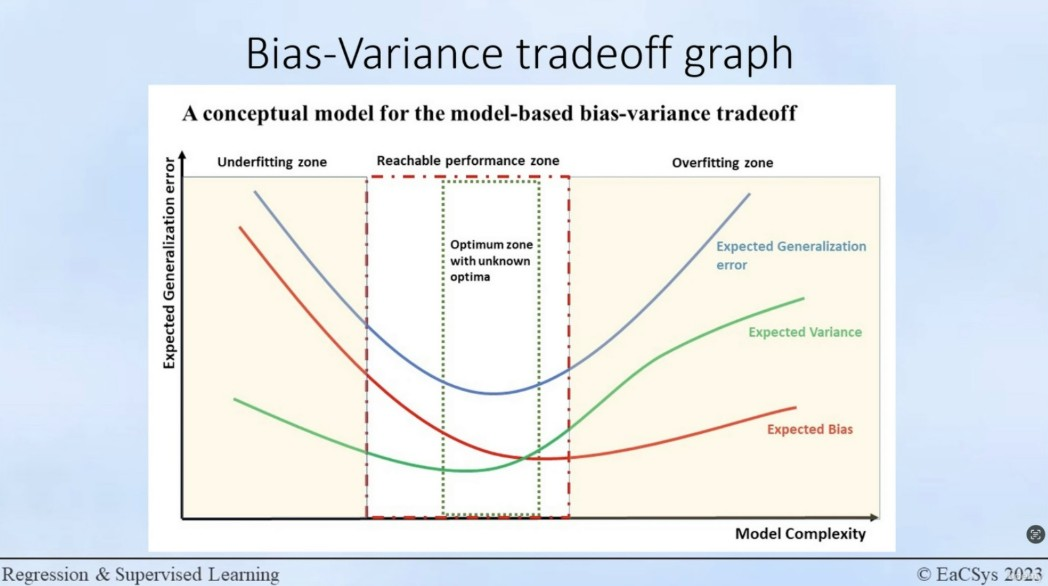

In [ ]:
from IPython.display import Image
Image(filename=r"C:\Users\Admon\Desktop\bias.jpg")

### Definición 2: Curva de Aprendizaje

Se define la curva de aprendizaje como la gráfica que muestra cómo el rendimiento de un modelo (medido por el error o la precisión) evoluciona a medida que aumenta la cantidad de datos de entrenamiento.

Componentes de la Curva de Aprendizaje:

* Eje X (Cantidad de datos de entrenamiento): Representa el tamaño del conjunto de entrenamiento, desde un pequeño subconjunto hasta el conjunto completo.

* Eje Y (Error o Precisión): Representa el error (por ejemplo, error cuadrático medio) o la precisión del modelo.

En este contexto se tienen dos curvas principales:

* Error de entrenamiento: Mide el rendimiento del modelo en los datos de entrenamiento.

* Error de validación: Mide el rendimiento del modelo en un conjunto de validación (datos no vistos).

#### Nota: Ambas curvas convergen a un valor estable, que representa el error de generalización. La curva de aprendizaje es una herramienta útil para diagnosticar problemas como el overfitting o el underfitting, y para entender si el modelo se beneficiaría de más datos.

### Ejemplo 1:

Aunque en la práctica, es casi imposible encontrar un conjunto de datos que no presente problemas de overfitting, underfitting ni bias-variance tradeoff, que estos son fenómenos inherentes al proceso de modelado en machine learning, podemos generar con un conjunto de datos teóricos que esté bien diseñado para ilustrar un caso ideal donde el modelo se ajusta correctamente y las curvas de aprendizaje muestran un comportamiento óptimo.


Para esto generamos datos linealmente relacionados como
$$y=2x+\text{ruido}$$
que son se modelan con una regresión lineal. El ruido es de tipo gaussiano, añade variabilidad, pero no tanto como para causar overfitting o underfitting.


In [ ]:
# En este notebooks usaremos las siguientes librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

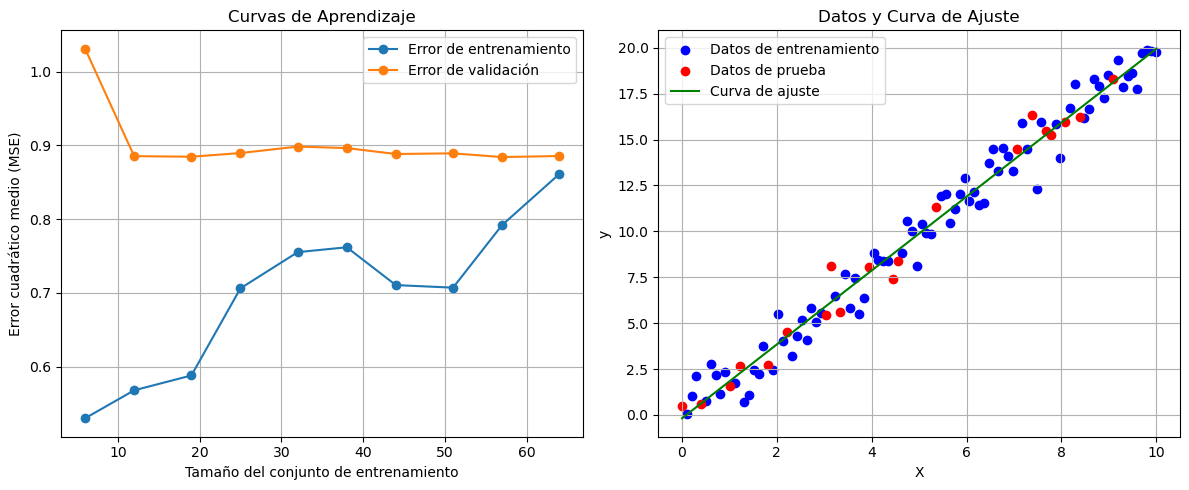

Error de entrenamiento (MSE): 0.8634693050533706
Error de prueba (MSE): 0.6220422422901779


In [ ]:
# Generamos un conjunto de datos teórico bien comportado
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 puntos entre 0 y 10
y = 2 * X.squeeze() + np.random.normal(0, 1, 100)  # y = 2x + ruido gaussiano

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Calculamos las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convertimos a errores cuadráticos medios (MSE)
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Graficamos las curvas de aprendizaje
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_errors, label="Error de entrenamiento", marker="o")
plt.plot(train_sizes, val_errors, label="Error de validación", marker="o")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.grid(True)

# Entrenamos el modelo con todos los datos de entrenamiento
model.fit(X_train, y_train)

# Graficamos los datos y la curva de ajuste
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color="blue", label="Datos de entrenamiento")
plt.scatter(X_test, y_test, color="red", label="Datos de prueba")
plt.plot(X, model.predict(X), color="green", label="Curva de ajuste")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos y Curva de Ajuste")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculamos el error en entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Error de entrenamiento (MSE): {train_mse}")
print(f"Error de prueba (MSE): {test_mse}")

En este ejemplo procedemos asi:

* Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%).

* Usamos un modelo simple (regresión lineal) que es adecuado para estos datos.

* Usamos learning_curve para calcular el error de entrenamiento y validación en diferentes tamaños del conjunto de entrenamiento.

* El error se mide como el error cuadrático medio (MSE).

* Mostramos cómo el error de entrenamiento y validación evolucionan a medida que aumenta el tamaño del conjunto de entrenamiento.

* Entrenamos el modelo con todos los datos de entrenamiento.

* Calculamos el error de entrenamiento y prueba para verificar que el modelo generaliza bien.


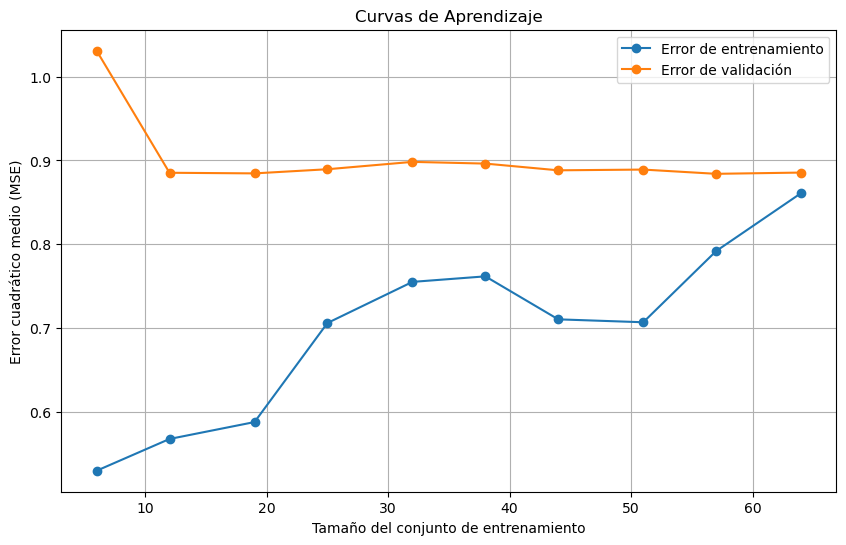

In [ ]:
# Gráfica de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="Error de entrenamiento", marker="o")
plt.plot(train_sizes, val_errors, label="Error de validación", marker="o")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.grid(True)
plt.show()

### Ejemplo 2:

Ahora veamos como para los mismos datos, un modelo que sea demasiado complejo, como un polinomio de alto grado, hará que el modelo se ajuste demasiado a los datos de entrenamiento, capturando incluso el ruido, y por lo tanto tendrá un rendimiento pobre en los datos de validación.


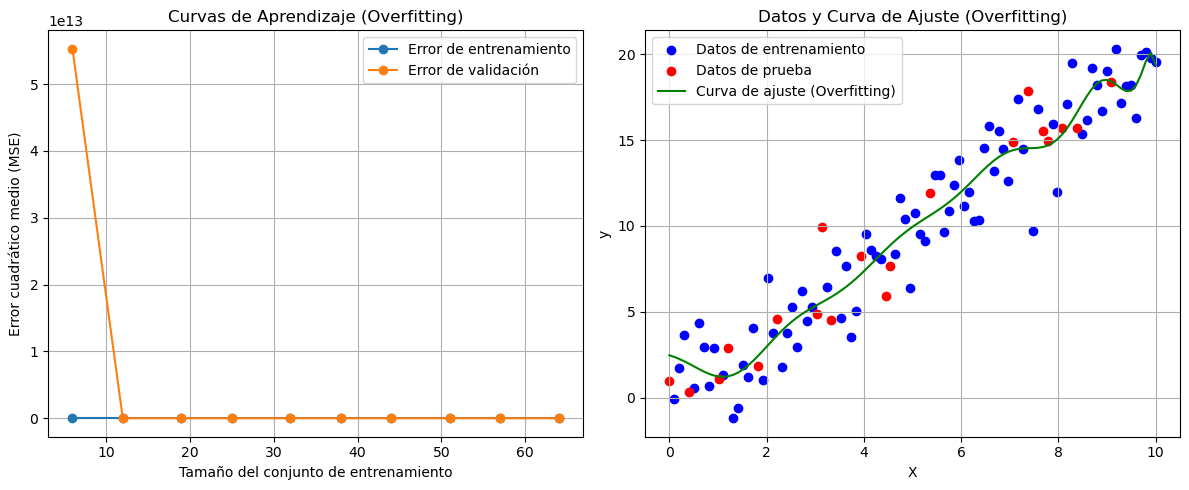

Error de entrenamiento (MSE): 3.011729678987334
Error de prueba (MSE): 2.768013919840185


In [ ]:
# Generamos un conjunto de datos teórico
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 puntos entre 0 y 10
y = 2 * X.squeeze() + np.random.normal(0, 2, 100)  # y = 2x + ruido gaussiano

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un modelo polinómico de alto grado (para inducir overfitting)
grado_polinomio = 15  # Un grado muy alto para sobreajustar
model = make_pipeline(PolynomialFeatures(grado_polinomio), LinearRegression())

# Calculamos las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error",
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

# Convertimos a errores cuadráticos medios (MSE)
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Graficamos las curvas de aprendizaje
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_errors, label="Error de entrenamiento", marker="o")
plt.plot(train_sizes, val_errors, label="Error de validación", marker="o")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curvas de Aprendizaje (Overfitting)")
plt.legend()
plt.grid(True)

# Entrenamos el modelo con todos los datos de entrenamiento
model.fit(X_train, y_train)

# Graficamos los datos y la curva de ajuste
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color="blue", label="Datos de entrenamiento")
plt.scatter(X_test, y_test, color="red", label="Datos de prueba")
plt.plot(X_plot, y_plot, color="green", label="Curva de ajuste (Overfitting)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos y Curva de Ajuste (Overfitting)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculamos el error en entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Error de entrenamiento (MSE): {train_mse}")
print(f"Error de prueba (MSE): {test_mse}")

Usamos un polinomio de grado 15, que es demasiado complejo para estos datos. Esto induce overfitting porque el modelo intentará ajustarse a cada pequeño detalle, incluyendo el ruido. En este caso hemos usado como modelo de regresión, un polinomio de grado 15, que es demasiado complejo para estos datos. Esto induce overfitting porque el modelo intentará ajustarse a cada pequeño detalle, incluyendo el ruido. Esto se debe a que un polinomio de grado 15 tiene 16 coeficientes $$\left(a_{15}, a_{14}, \ldots, a_0\right)$$ que el modelo debe aprender. Con tantos parámetros, el modelo tiene la capacidad de ajustarse a casi cualquier patrón en los datos, incluso si ese patrón es solo ruido. Esto hará que el modelo intente pasar exactamente por cada punto de entrenamiento, incluso si esos puntos son outliers o están afectados por ruido.
Esto hace que la curva de ajuste sea muy "ondulada" y siga fluctuaciones aleatorias en los datos.

### Ejemplo 3:

Ahora vamos a complementar este análisis con gráficos residuales y un diagnósticos de modelos estadísticos para evaluar la calidad de un modelo de regresión. Con esto vamos a identificar problemas como:

* No linealidad: Si los residuos muestran un patrón no aleatorio.

* Heterocedasticidad: Si la varianza de los residuos no es constante.

* Outliers: Si hay puntos que se desvían significativamente del resto.

* Normalidad de los residuos: Si los residuos siguen una distribución normal.

De manera concreta realizamos un cálculo de residuos:

#### Los residuos son la diferencia entre los valores reales y los predichos.

Gráficos residuales y diagnósticos:

* Residuos vs Valores Ajustados: Para detectar patrones no aleatorios o heterocedasticidad.

* Histograma de residuos: Para verificar la distribución de los residuos.


* Gráfico Q-Q: Para verificar si los residuos siguen una distribución normal.


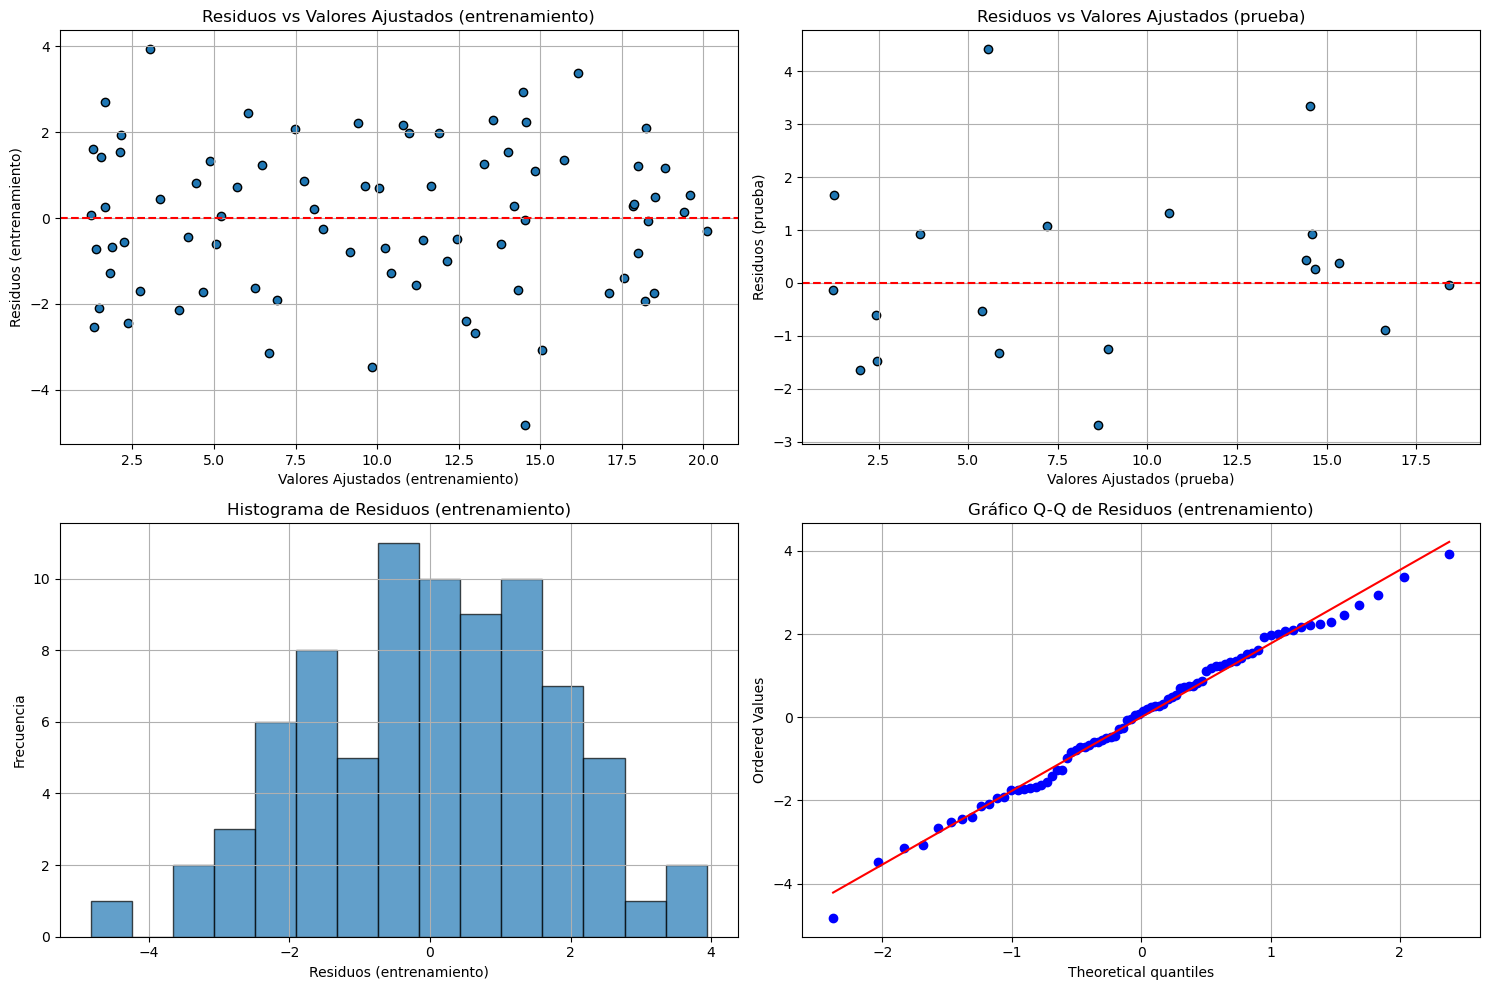

Error de entrenamiento (MSE): 3.011729678987334
Error de prueba (MSE): 2.768013919840185


In [ ]:
# Generamos un conjunto de datos teórico
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 puntos entre 0 y 10
y = 2 * X.squeeze() + np.random.normal(0, 2, 100)  # y = 2x + ruido gaussiano

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un modelo polinómico de alto grado (para inducir overfitting)
grado_polinomio = 15  # Un grado muy alto para sobreajustar
model = make_pipeline(PolynomialFeatures(grado_polinomio), LinearRegression())

# Entrenamos el modelo
model.fit(X_train, y_train)

# Predecimos en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculamos los residuos
residuos_train = y_train - y_train_pred
residuos_test = y_test - y_test_pred

# Gráficos residuales y diagnósticos
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_train_pred, residuos_train, edgecolor="k")
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados (entrenamiento)")
plt.ylabel("Residuos (entrenamiento)")
plt.title("Residuos vs Valores Ajustados (entrenamiento)")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(y_test_pred, residuos_test, edgecolor="k")
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados (prueba)")
plt.ylabel("Residuos (prueba)")
plt.title("Residuos vs Valores Ajustados (prueba)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(residuos_train, bins=15, edgecolor="k", alpha=0.7)
plt.xlabel("Residuos (entrenamiento)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (entrenamiento)")
plt.grid(True)

plt.subplot(2, 2, 4)
stats.probplot(residuos_train, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos (entrenamiento)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimimos métricas de error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Error de entrenamiento (MSE): {train_mse}")
print(f"Error de prueba (MSE): {test_mse}")

#### Interpretación de los Gráficos

    Residuos vs Valores Ajustados:

* Si los residuos están distribuidos aleatoriamente alrededor de la línea horizontal en 0, indica que el modelo es adecuado.

* Si hay un patrón claro (por ejemplo, una curva), sugiere que el modelo no está capturando alguna relación no lineal.

    Histograma de Residuos:

* Si los residuos siguen una distribución normal, el histograma debería ser simétrico y centrado en 0.

* Si hay sesgo o colas pesadas, indica que los residuos no son normales.

    Gráfico Q-Q:

* Si los puntos siguen la línea recta, los residuos siguen una distribución normal.

* Desviaciones de la línea sugieren no normalidad.

Ahora veamos este mismo análisis, para los datos sometidos al modelo de regresión lineal

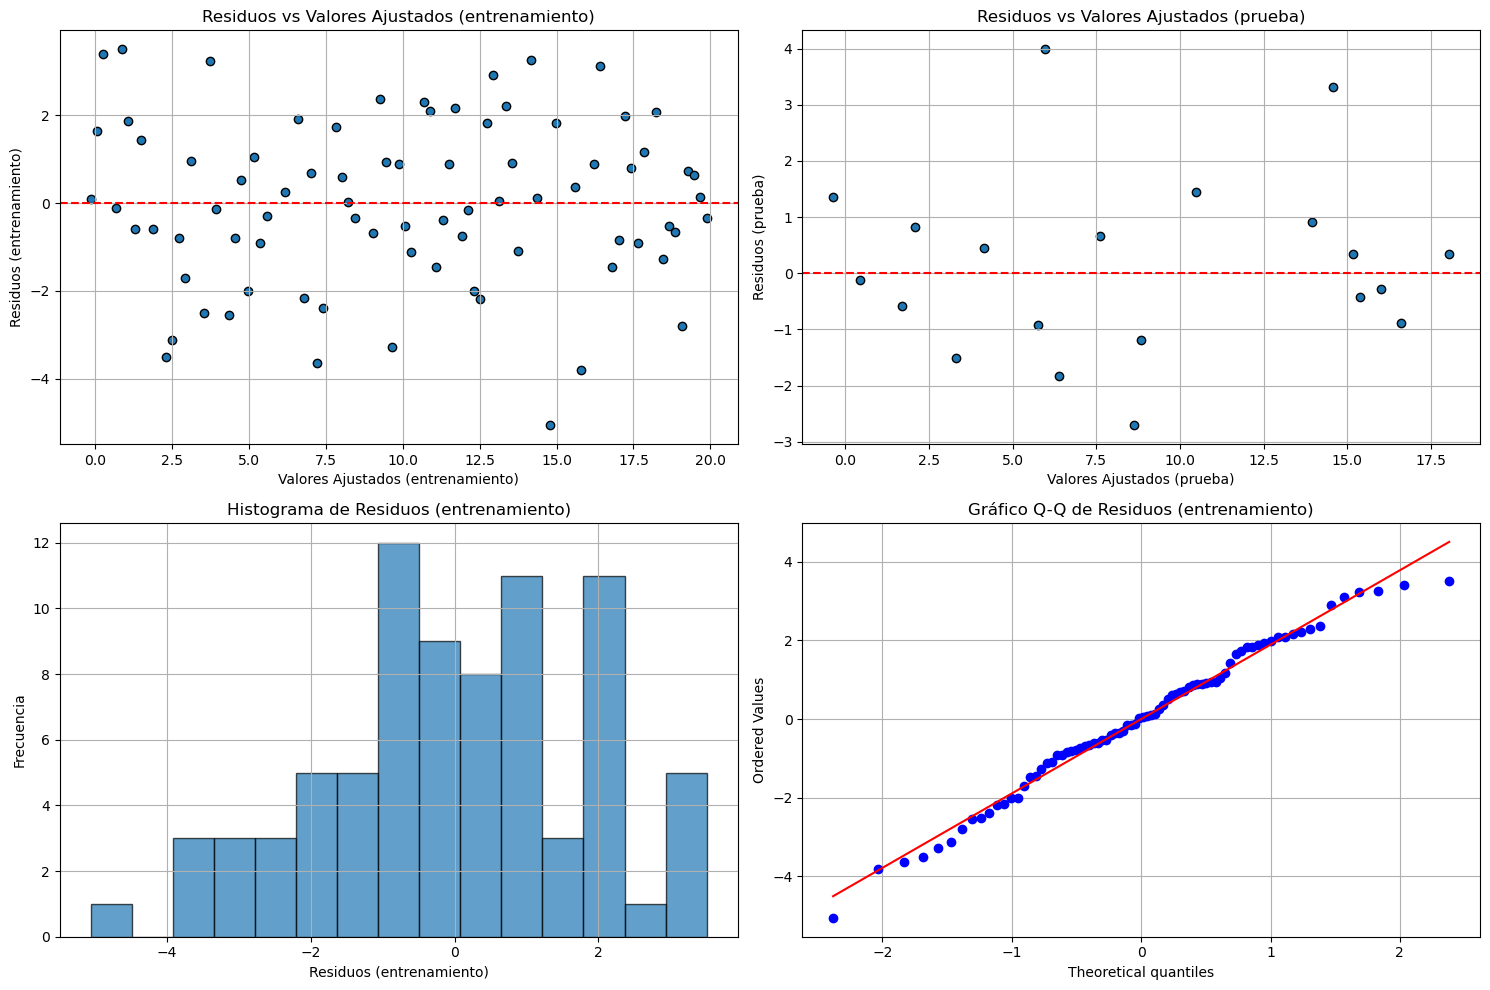

Error de entrenamiento (MSE): 3.4538772202134824
Error de prueba (MSE): 2.4881689691607116


In [ ]:
# Generamos un conjunto de datos teórico
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 puntos entre 0 y 10
y = 2 * X.squeeze() + np.random.normal(0, 2, 100)  # y = 2x + ruido gaussiano

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Predecimos en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculamos los residuos
residuos_train = y_train - y_train_pred
residuos_test = y_test - y_test_pred

# Gráficos residuales y diagnósticos
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_train_pred, residuos_train, edgecolor="k")
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados (entrenamiento)")
plt.ylabel("Residuos (entrenamiento)")
plt.title("Residuos vs Valores Ajustados (entrenamiento)")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(y_test_pred, residuos_test, edgecolor="k")
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados (prueba)")
plt.ylabel("Residuos (prueba)")
plt.title("Residuos vs Valores Ajustados (prueba)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(residuos_train, bins=15, edgecolor="k", alpha=0.7)
plt.xlabel("Residuos (entrenamiento)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (entrenamiento)")
plt.grid(True)

plt.subplot(2, 2, 4)
stats.probplot(residuos_train, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos (entrenamiento)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimimos métricas de error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Error de entrenamiento (MSE): {train_mse}")
print(f"Error de prueba (MSE): {test_mse}")

### Definición 4:

el overfiting o sobreajuste en un conjunto de datos es la producción de un análisis que se corresponde demasiado o con demasiada exactitud con un conjunto particular de datos y, por lo tanto, puede no ajustarse a datos adicionales o predecir observaciones futuras de manera confiable".

Un modelo sobreajustado es un modelo matemático que contiene más parámetros de los que pueden justificarse con los datos. En un sentido matemático, estos parámetros representan el grado de un polinomio. La esencia del sobreajuste es haber extraído sin saberlo parte de la variación residual (es decir, el ruido) como si esa variación representara la estructura subyacente del modelo.

### Definición 3:

El underfitting  o subajuste en un conjunto de datos se define como la incapacidad de un modelo matemático de capturar adecuadamente la estructura subyacente de los datos.

Un modelo subajustado es un modelo en el que faltan algunos parámetros o términos que aparecerían en un modelo especificado correctamente. El subajuste se produciría, por ejemplo, al ajustar un modelo lineal a datos no lineales. Un modelo de este tipo tenderá a tener un rendimiento predictivo deficiente.

### Ejemplo 4:

Vamos a usar un modelo demasiado simple, como una regresión lineal, en un conjunto de datos que tiene una relación no lineal subyacente. Esto hará que el modelo no capture la complejidad de los datos, resultando en un rendimiento pobre tanto en el conjunto de entrenamiento como en el de validación.

Como en los ejemplos anteriores, generación un conjunto de datos que funciones para propositos teóricos, con una relación no lineal
$$(y=2 \cdot \sin (x))$$
y añadimos ruido gaussiano.


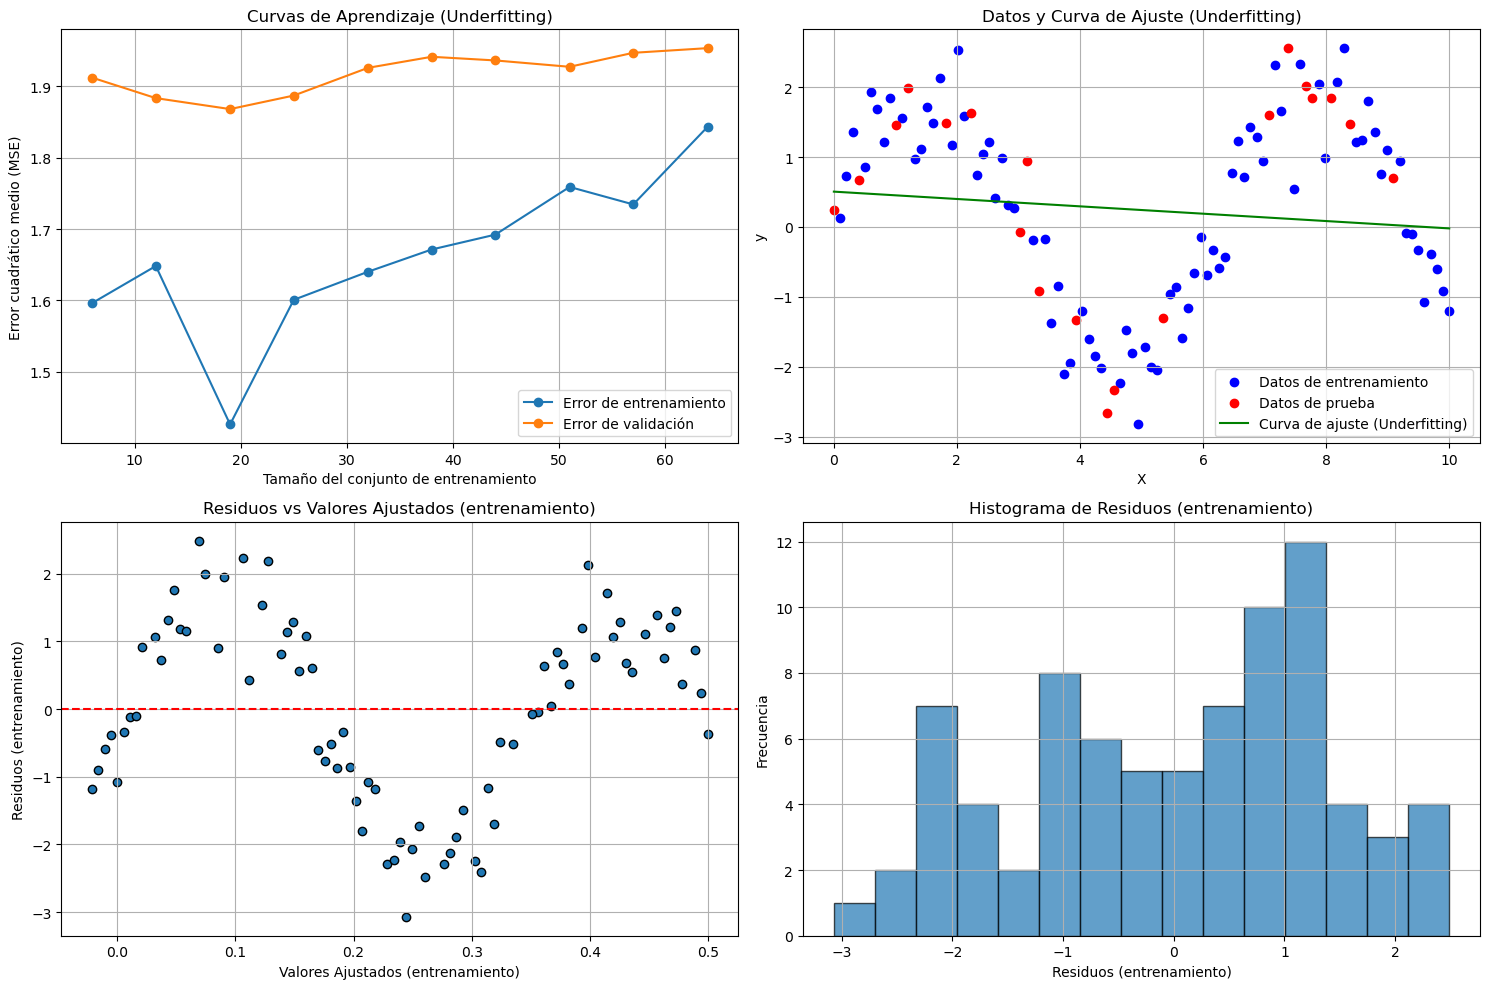

Error de entrenamiento (MSE): 1.8540169386815673
Error de prueba (MSE): 2.4493573137258116


In [ ]:
# Generamos un conjunto de datos teórico no lineal
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 puntos entre 0 y 10
y = 2 * np.sin(X.squeeze()) + np.random.normal(0, 0.5, 100)  # y = 2*sin(x) + ruido

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un modelo lineal (demasiado simple para estos datos)
model = LinearRegression()

# Calculamos las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convertimos a errores cuadráticos medios (MSE)
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Graficamos las curvas de aprendizaje
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(train_sizes, train_errors, label="Error de entrenamiento", marker="o")
plt.plot(train_sizes, val_errors, label="Error de validación", marker="o")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Curvas de Aprendizaje (Underfitting)")
plt.legend()
plt.grid(True)

# Entrenamos el modelo con todos los datos de entrenamiento
model.fit(X_train, y_train)

# Graficamos los datos y la curva de ajuste
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.subplot(2, 2, 2)
plt.scatter(X_train, y_train, color="blue", label="Datos de entrenamiento")
plt.scatter(X_test, y_test, color="red", label="Datos de prueba")
plt.plot(X_plot, y_plot, color="green", label="Curva de ajuste (Underfitting)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos y Curva de Ajuste (Underfitting)")
plt.legend()
plt.grid(True)

# Predecimos en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculamos los residuos
residuos_train = y_train - y_train_pred
residuos_test = y_test - y_test_pred

plt.subplot(2, 2, 3)
plt.scatter(y_train_pred, residuos_train, edgecolor="k")
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados (entrenamiento)")
plt.ylabel("Residuos (entrenamiento)")
plt.title("Residuos vs Valores Ajustados (entrenamiento)")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(residuos_train, bins=15, edgecolor="k", alpha=0.7)
plt.xlabel("Residuos (entrenamiento)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (entrenamiento)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimimos métricas de error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Error de entrenamiento (MSE): {train_mse}")
print(f"Error de prueba (MSE): {test_mse}")

### Definición 5:

El término bias-variance tradeoff (dilema entre sesgo y varianza) describe la relación entre la complejidad de un modelo, la exactitud de sus predicciones y su capacidad para realizar predicciones sobre datos no observados previamente que no se utilizaron para entrenar el modelo.

Esto es, el bias-variance tradeoff describe la compensación entre el sesgo (bias) y la varianza (variance) de un modelo. Un modelo con alto sesgo es demasiado simple y no captura la complejidad de los datos (underfitting), mientras que un modelo con alta varianza es demasiado complejo y se ajusta demasiado a los datos de entrenamiento (overfitting). El objetivo es encontrar un equilibrio óptimo entre ambos.

### Ejemplo 5:

Para el conjunto de datos del ejemplo anterior, evaluamos modelos con diferentes grados polinómicos:

* Grado 1: Un modelo lineal (underfitting).

* Grado 5: Un modelo polinómico de grado intermedio (óptimo).

* Grado 15: Un modelo polinómico de alto grado (overfitting)


Evaluando modelo con grado 1:


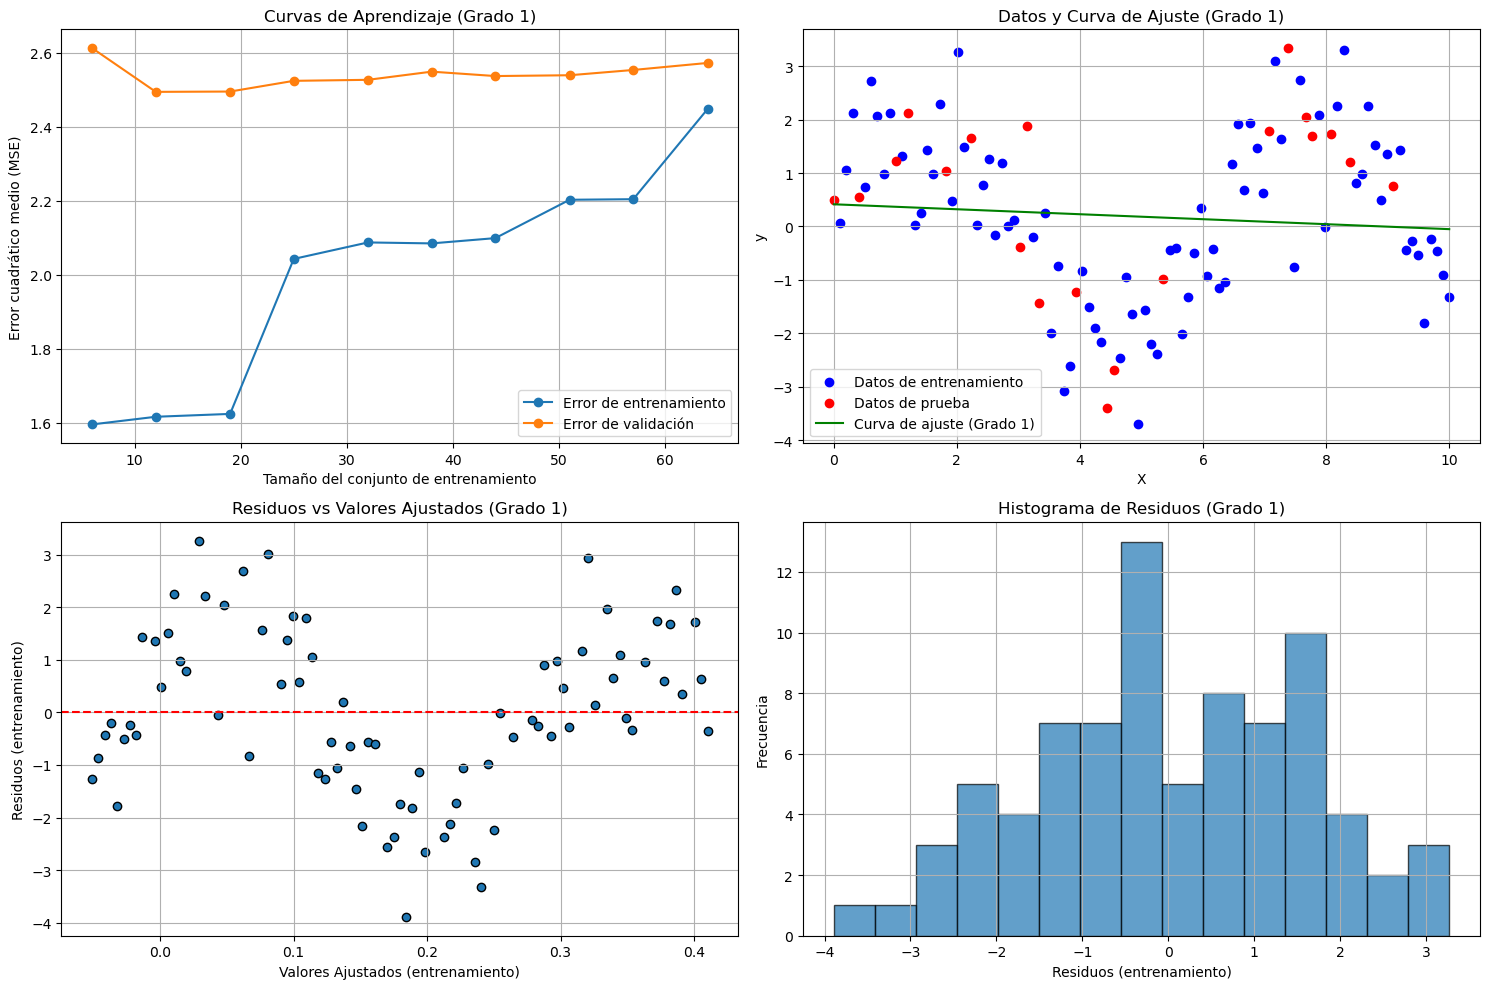

Error de entrenamiento (MSE): 2.459833359304775
Error de prueba (MSE): 3.102731050537689

Evaluando modelo con grado 5:


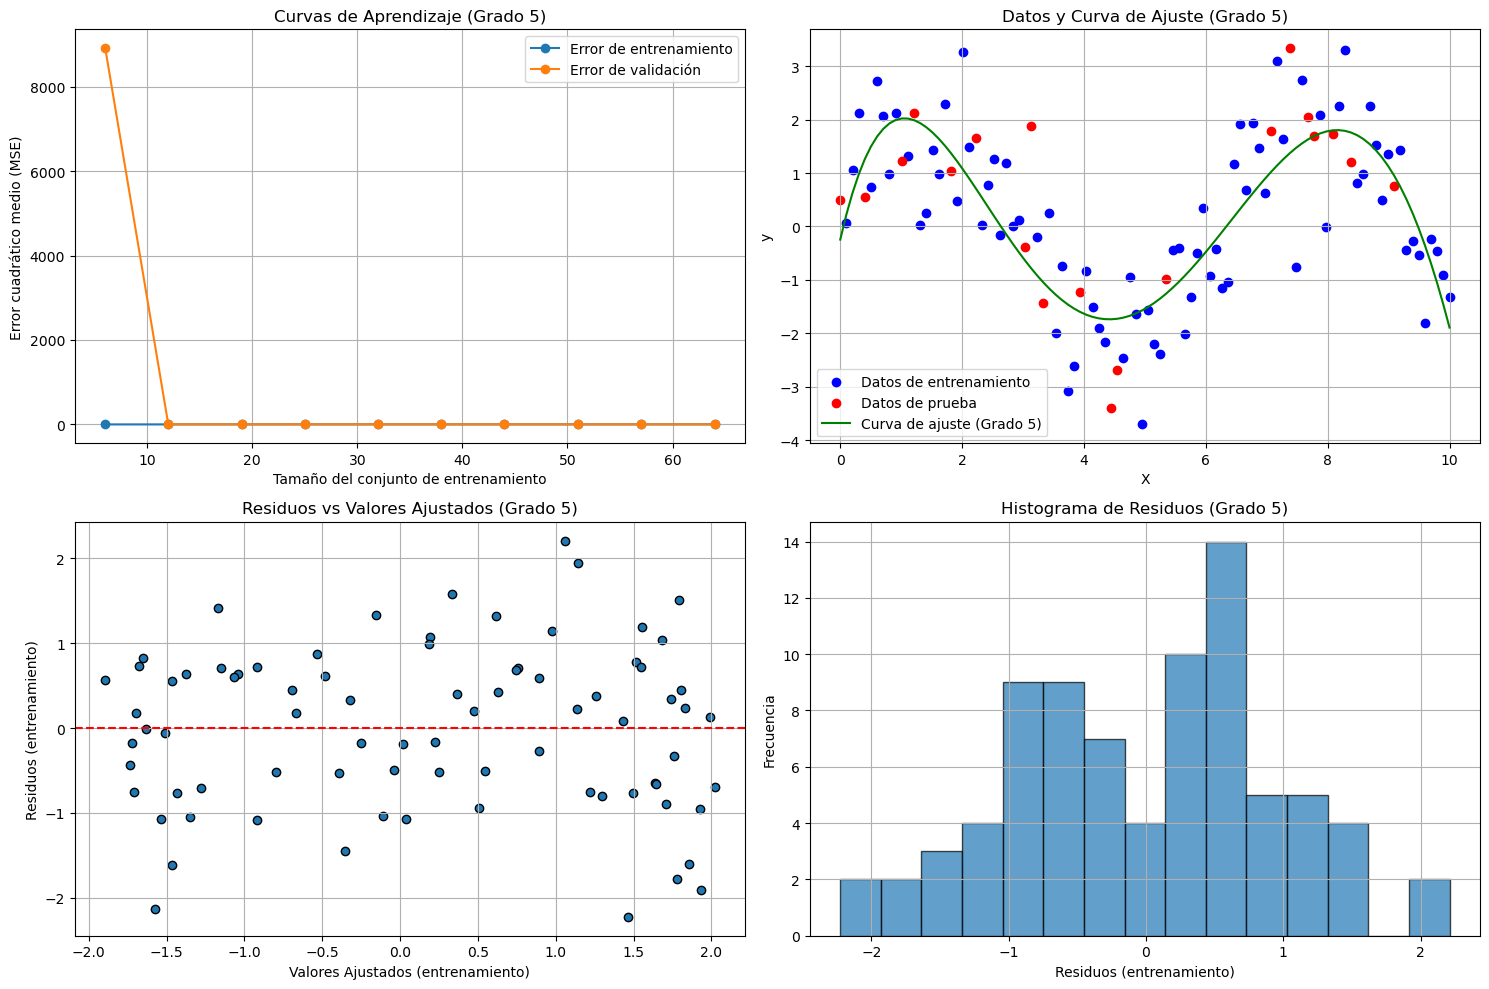

Error de entrenamiento (MSE): 0.9048187947429074
Error de prueba (MSE): 0.9432046921125892

Evaluando modelo con grado 15:


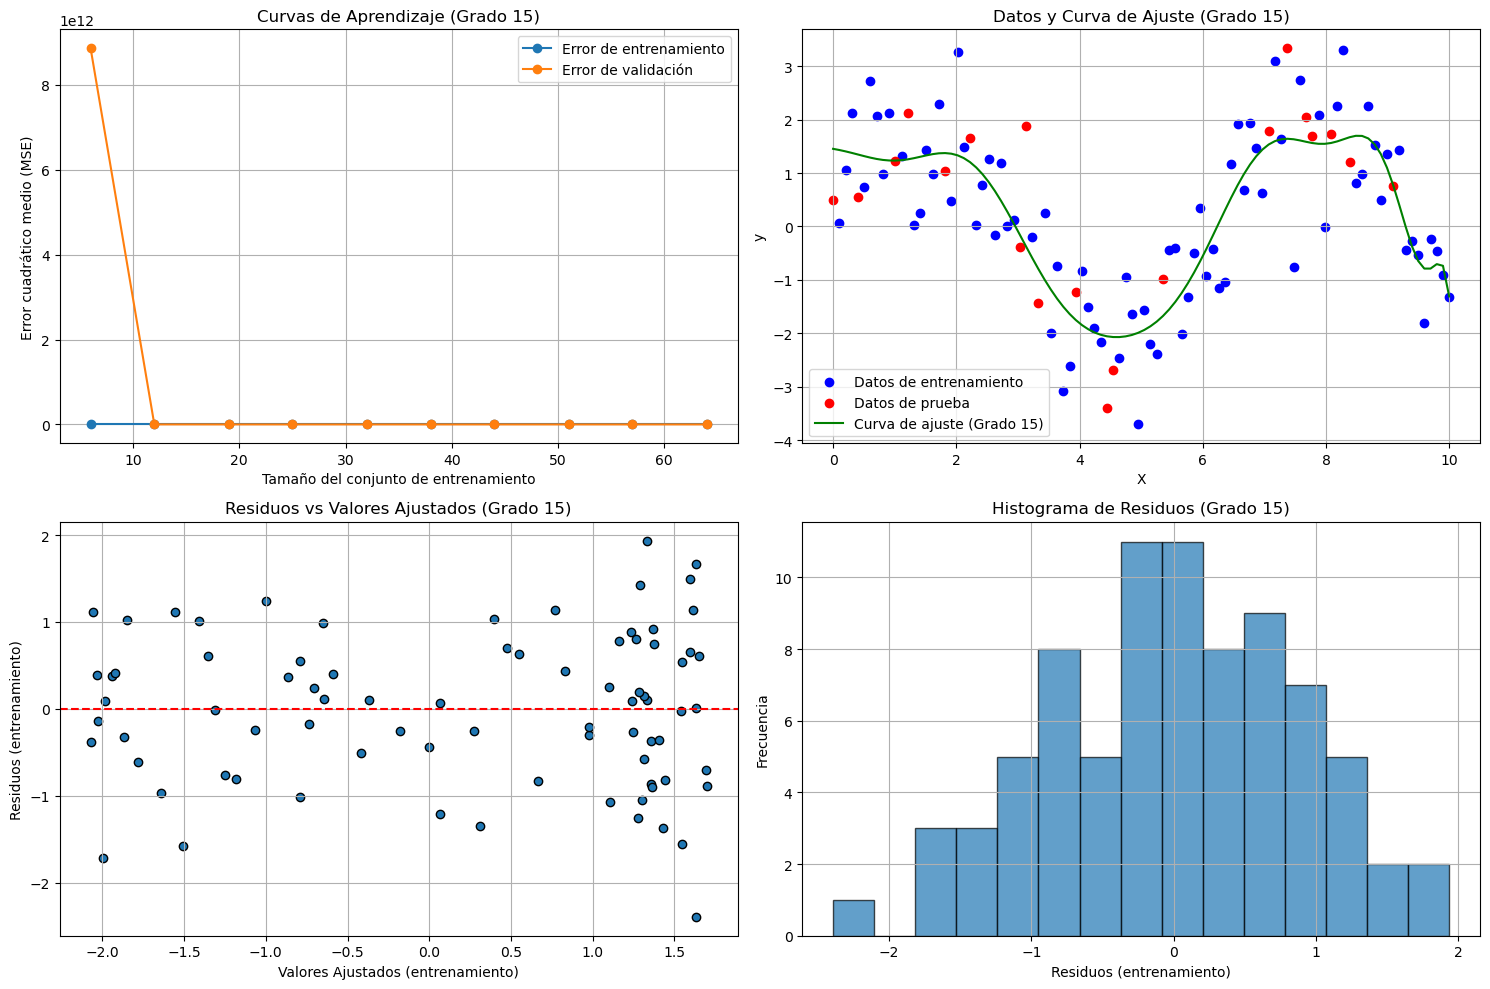

Error de entrenamiento (MSE): 0.7613618528869527
Error de prueba (MSE): 0.7240650966629621


In [ ]:
# Generamos un conjunto de datos teórico no lineal
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 puntos entre 0 y 10
y = 2 * np.sin(X.squeeze()) + np.random.normal(0, 1, 100)  # y = 2*sin(x) + ruido

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para entrenar y evaluar un modelo polinómico
def evaluar_modelo(grado_polinomio):
    # Creamos el modelo polinómico
    model = make_pipeline(PolynomialFeatures(grado_polinomio), LinearRegression())

    # Calculamos las curvas de aprendizaje
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_errors = -train_scores.mean(axis=1)
    val_errors = -val_scores.mean(axis=1)

    # Entrenamos el modelo con todos los datos de entrenamiento
    model.fit(X_train, y_train)

    # Predecimos en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculamos los residuos
    residuos_train = y_train - y_train_pred
    residuos_test = y_test - y_test_pred

    # Graficamos las curvas de aprendizaje
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.plot(train_sizes, train_errors, label="Error de entrenamiento", marker="o")
    plt.plot(train_sizes, val_errors, label="Error de validación", marker="o")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Error cuadrático medio (MSE)")
    plt.title(f"Curvas de Aprendizaje (Grado {grado_polinomio})")
    plt.legend()
    plt.grid(True)

    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.subplot(2, 2, 2)
    plt.scatter(X_train, y_train, color="blue", label="Datos de entrenamiento")
    plt.scatter(X_test, y_test, color="red", label="Datos de prueba")
    plt.plot(X_plot, y_plot, color="green", label=f"Curva de ajuste (Grado {grado_polinomio})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Datos y Curva de Ajuste (Grado {grado_polinomio})")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.scatter(y_train_pred, residuos_train, edgecolor="k")
    plt.axhline(y=0, color="r", linestyle="--")
    plt.xlabel("Valores Ajustados (entrenamiento)")
    plt.ylabel("Residuos (entrenamiento)")
    plt.title(f"Residuos vs Valores Ajustados (Grado {grado_polinomio})")
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.hist(residuos_train, bins=15, edgecolor="k", alpha=0.7)
    plt.xlabel("Residuos (entrenamiento)")
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de Residuos (Grado {grado_polinomio})")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Imprimimos métricas de error
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Error de entrenamiento (MSE): {train_mse}")
    print(f"Error de prueba (MSE): {test_mse}")

# Evaluamos modelos con diferentes grados polinómicos
grados = [1, 5, 15]  # Grado 1 (underfitting), Grado 5 (óptimo), Grado 15 (overfitting)
for grado in grados:
    print(f"\nEvaluando modelo con grado {grado}:")
    evaluar_modelo(grado)